In [1]:

import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly_express as px
init_notebook_mode(connected=True)
from scipy.ndimage.filters import gaussian_filter1d
import datetime
import calendar
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
states=pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
states_daily=pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
districts=pd.read_csv('https://api.covid19india.org/csv/latest/districts.csv')
district_wise=pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv')
#tests=pd.read_csv('https://api.covid19india.org/csv/latest/tested_numbers_icmr_data.csv')

## DATA PREPROCESSING

In [5]:
def fill_unknown(x):
    d=x[0]
    s=x[1]
    if(d=='Unknown'):
        return s+"_"+"unknown"
    return d

def fill_active(x):
    conf=x[0]
    rec=x[1]
    dea=x[2]
    return x[0]-(x[2]+x[1])

def fill_mortality(x):
    conf=x[0]
    dea=x[1]
    return (x[1]/x[0])*100

def fill_recovery(x):
    conf=x[0]
    rec=x[1]
    return (x[1]/x[0])*100

def change(x):
    return x.strftime('%b-%Y')


districts['District']=districts[['District','State']].apply(fill_unknown,axis=1)
districts.drop(columns=['State'],inplace=True)
districts['Date'] = pd.to_datetime(districts['Date'],infer_datetime_format=True)
districts['Tested']=districts['Tested'].fillna(0)
#districts.head()

districts_all=np.sort(districts['District'].unique())

dis_df = pd.DataFrame(columns = ['Date', 'District', 'Confirmed', 'Recovered', 'Deceased', 'Other',
       'Tested']) 
for i in districts_all:
    if(i!='India'):
        dis_data=districts[districts['District']==i]
        dis_data=dis_data.groupby('Date',as_index=False).last()
        dis_df=dis_df.append(dis_data)

dis_df1=dis_df.groupby('District',as_index=False).last()
dis_df1.sort_values('Tested',ascending=False)

dis_df1['Active']=dis_df1[['Confirmed','Recovered','Deceased']].apply(fill_active,axis=1)
dis_df1['Mortality Rate(per 100)']=dis_df1[['Confirmed','Deceased']].apply(fill_mortality,axis=1)   
dis_df1['Recovery Rate(per 100)']=dis_df1[['Confirmed','Recovered']].apply(fill_recovery,axis=1)



In [6]:
states['Date'] = pd.to_datetime(states['Date'],infer_datetime_format=True)

states_all=np.sort(states['State'].unique())

df = pd.DataFrame(columns = ['Date', 'State', 'Confirmed', 'Recovered', 'Deceased', 'Other',
       'Tested']) 
for i in states_all:
    if(i!='India'):
        state_data=states[states['State']==i]
        state_data=state_data.groupby('Date',as_index=False).last()
        df=df.append(state_data)
        
df1=df.groupby('State',as_index=False).last()

india_data=states[states['State']=='India']
india_data['Date'] = pd.to_datetime(india_data['Date'],infer_datetime_format=True).dt.to_period('m')
india_data=india_data.groupby('Date',as_index=False).last()

india_data['Active']=india_data[['Confirmed','Recovered','Deceased']].apply(fill_active,axis=1)
india_data['Mortality Rate(per 100)']=india_data[['Confirmed','Deceased']].apply(fill_mortality,axis=1)
india_data['Recovery Rate(per 100)']=india_data[['Confirmed','Recovered']].apply(fill_recovery,axis=1)
india_data['Tested']=india_data['Tested'].fillna(0)
india_data['Date']=india_data['Date'].apply(change)

df1['Active']=df1[['Confirmed','Recovered','Deceased']].apply(fill_active,axis=1)
df1['Mortality Rate(per 100)']=df1[['Confirmed','Deceased']].apply(fill_mortality,axis=1)   
df1['Recovery Rate(per 100)']=df1[['Confirmed','Recovered']].apply(fill_recovery,axis=1)
df1=df1[df1['State']!='State Unassigned']

## LINE PLOT REPRESENTATION

(array([-5.0e+07,  0.0e+00,  5.0e+07,  1.0e+08,  1.5e+08,  2.0e+08,
         2.5e+08,  3.0e+08,  3.5e+08,  4.0e+08,  4.5e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

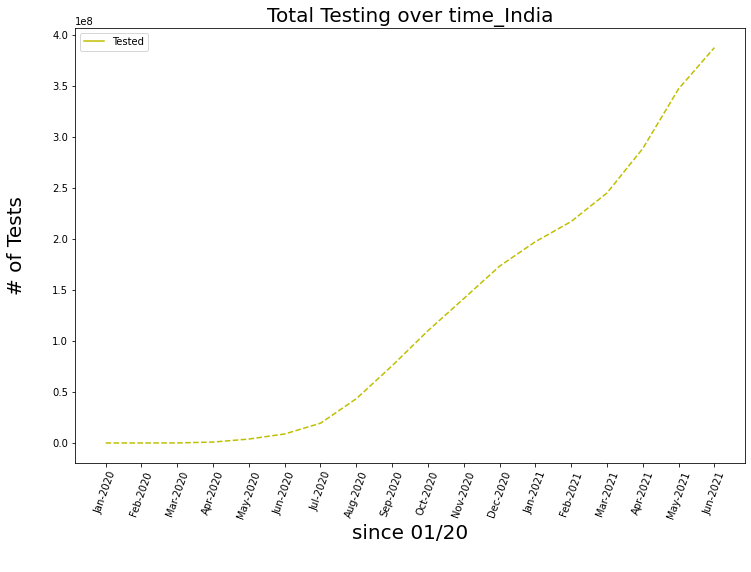

In [14]:
plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Tested",data = india_data ,color="y",label="Tested",sort=False)
fig.set_xlabel('since 01/20\n',size=20) 
fig.set_ylabel('# of Tests\n',size=20) 
fig.set_title("Total Testing over time_India",size=20)
fig.lines[0].set_linestyle("--")
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)





(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000., 35000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

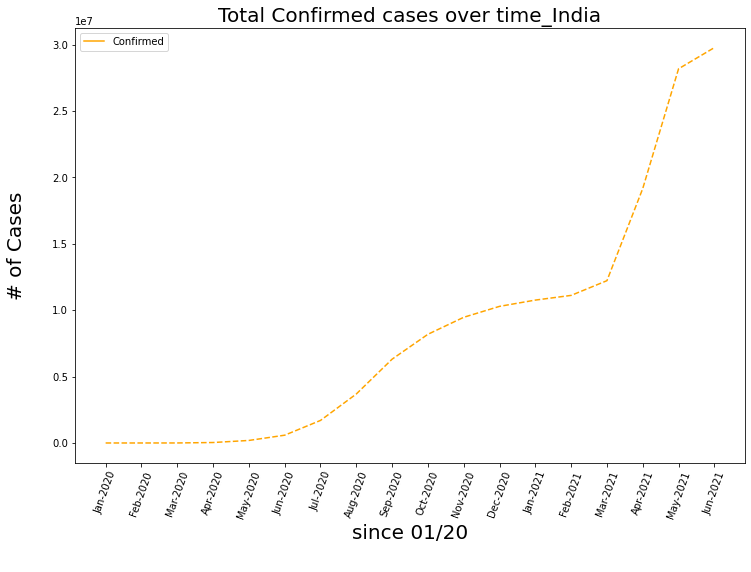

In [8]:
plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Confirmed",data = india_data ,color="orange",label="Confirmed",sort=False)
fig.set_xlabel('since 01/20\n',size=20) 
fig.set_ylabel('# of Cases\n',size=20) 
fig.set_title("Total Confirmed cases over time_India",size=20)
fig.lines[0].set_linestyle("--")
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)




(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

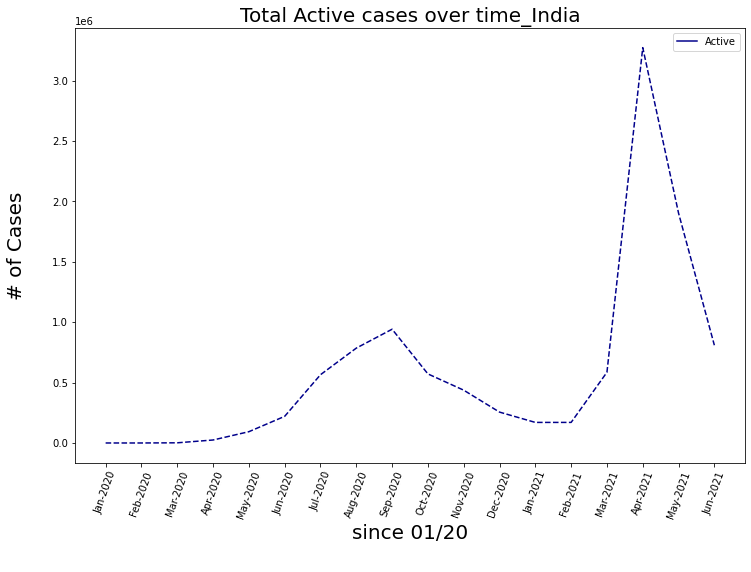

In [9]:
plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Active",data = india_data ,color="darkblue",label="Active",sort=False)
fig.set_xlabel('since 01/20\n',size=20) 
fig.set_ylabel('# of Cases\n',size=20) 
fig.set_title("Total Active cases over time_India",size=20)
fig.lines[0].set_linestyle("--")
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)



(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000., 35000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

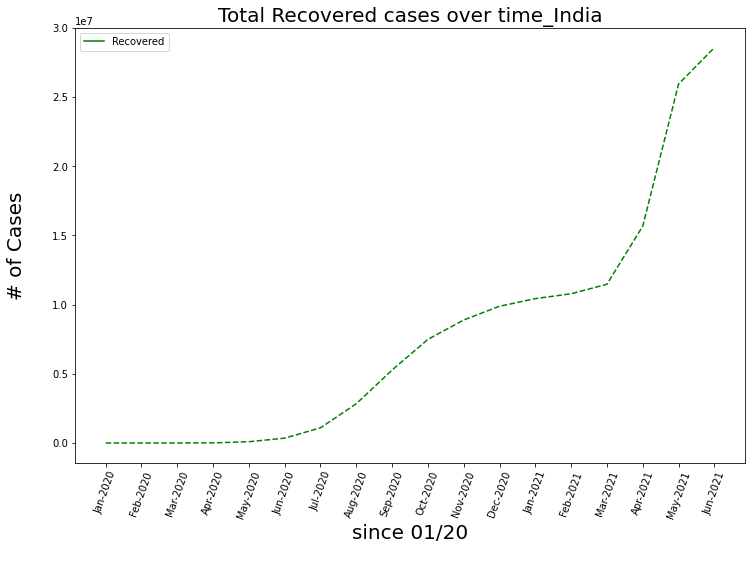

In [10]:


plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Recovered",data = india_data ,color="green",label="Recovered",sort=False)
fig.set_xlabel('since 01/20\n',size=20) 
fig.set_ylabel('# of Cases\n',size=20) 
fig.set_title("Total Recovered cases over time_India",size=20)
fig.lines[0].set_linestyle("--")
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)




(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

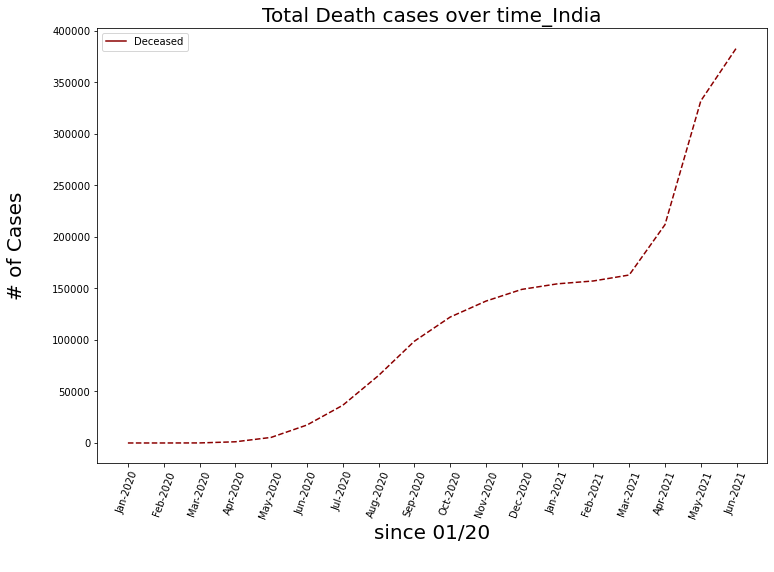

In [11]:

plt.figure(figsize=(12, 8))
fig = sns.lineplot(x="Date",y="Deceased",data = india_data ,color="darkred",label="Deceased",sort=False)
fig.set_xlabel('since 01/20\n',size=20) 
fig.set_ylabel('# of Cases\n',size=20) 
fig.set_title("Total Death cases over time_India",size=20)
fig.lines[0].set_linestyle("--")
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

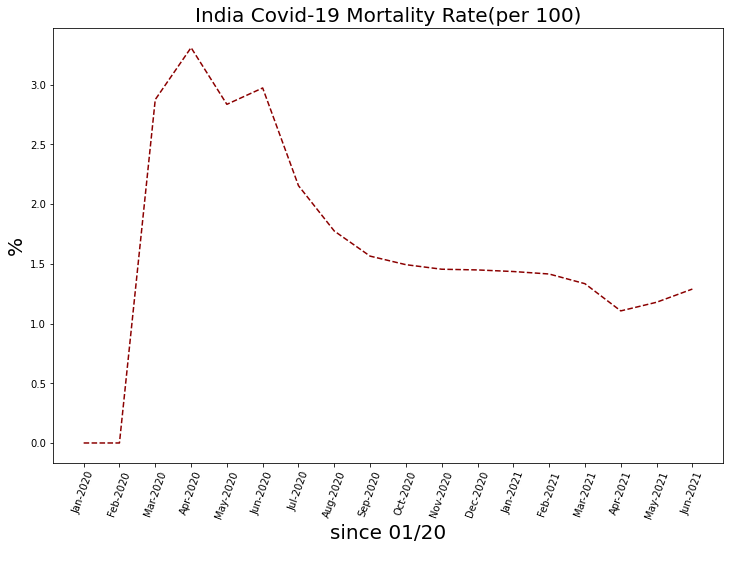

In [12]:

plt.figure(figsize=(12, 8))

fig=sns.lineplot(x='Date',y='Mortality Rate(per 100)',data=india_data,sort=False,color="darkred")
fig.set_ylabel('%',size=20) 
fig.set_xlabel('since 01/20\n',size=20) 
fig.set_title("India Covid-19 Mortality Rate(per 100)",size=20)
fig.lines[0].set_linestyle("--")
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)



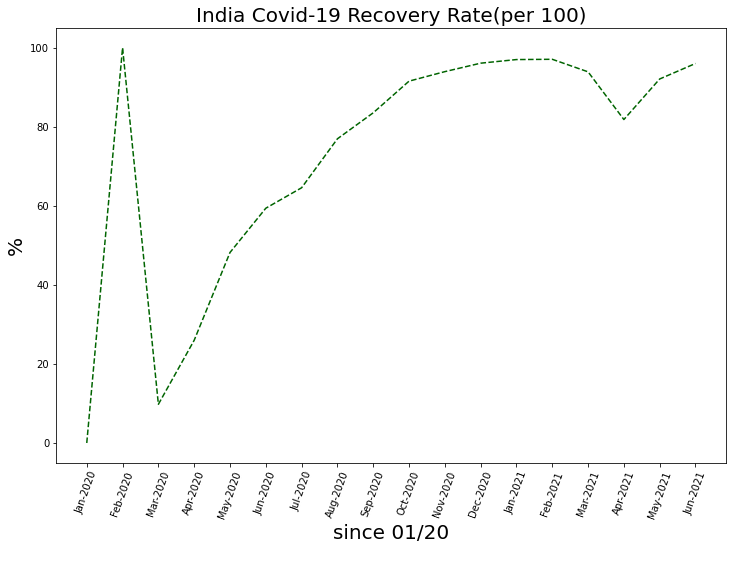

In [13]:
plt.figure(figsize=(12, 8))

fig=sns.lineplot(x='Date',y='Recovery Rate(per 100)',data=india_data,sort=False,color="darkgreen")
fig.set_ylabel('%',size=20) 
fig.set_xlabel('since 01/20\n',size=20) 
fig.set_title("India Covid-19 Recovery Rate(per 100)",size=20)
fig.lines[0].set_linestyle("--")
plt.xticks(size=10,rotation=70)
plt.yticks(size=10)
plt.show()

## PIE CHART COMPARISION

In [24]:
import plotly.graph_objects as go

last_row=india_data.shape[0]-1
ind_act=india_data['Active'].iloc[last_row]
ind_rec=india_data['Recovered'].iloc[last_row]
ind_deat=india_data['Deceased'].iloc[last_row]
colors=['lightgreen','mediumturquoise','darkorange']
labels = ['Active','Recovered','Deceased']
values = [ind_act,ind_rec,ind_deat]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,hoverinfo='label+percent')])
fig.update_traces(marker=dict(colors=colors,line=dict(color='#000000', width=0.8)))
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

## LINE PLOT COMPARISION

In [25]:
fig=px.line(df,
              x='Date', y='Confirmed', color='State',
              title='India_Growth')
fig.update_layout(
    title="Number of Confirmed Cases over Time",
    xaxis_title="Since 01/2020",
    yaxis_title="No. of Cases",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="RebeccaPurple"
    ),
    showlegend=False
)
fig.show()


In [26]:
fig=px.line(df,
              x='Date', y='Recovered', color='State',
              title='India_Growth')
fig.update_layout(
    title="Number of Recovered Cases over Time",
    xaxis_title="Since 01/2020",
    yaxis_title="No. of Cases",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="RebeccaPurple"
    ),
    showlegend=False
)
fig.show()

In [27]:
fig=px.line(df,
              x='Date', y='Deceased', color='State',
              title='India_Growth')
fig.update_layout(
    title="Number of Deaths Reported over Time",
    xaxis_title="Since 01/2020",
    yaxis_title="No. of Cases",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="RebeccaPurple"
    ),
    showlegend=False
)
fig.show()

## Geospatial Comparison

In [29]:
df1.State[df1['State']=='Jammu and Kashmir']='Jammu & Kashmir'
df1.State[df1['State']=='Andaman and Nicobar Islands']='Andaman & Nicobar'

fig = px.choropleth(df1.sort_values('Confirmed',ascending=False), geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson", color="Confirmed",
                    locations="State",locationmode='geojson-id', featureidkey="properties.ST_NM",
                    hover_data=["Tested"],
                    color_continuous_scale='Oranges',
                    title='India: Total Confirmed Cases_State-Wise',
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=500,margin={"r":0,"t":30,"l":0,"b":30})
fig.show()




In [30]:

fig = px.choropleth(df1.sort_values('Active',ascending=False), geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson", color="Active",
                    locations="State",locationmode='geojson-id', featureidkey="properties.ST_NM",
                    hover_data=["Confirmed",'Active'],
                    color_continuous_scale='Blues',
                    title='India: Total Active Cases_State-Wise'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=500,margin={"r":0,"t":30,"l":0,"b":30})
fig.show()



In [31]:
fig = px.choropleth(df1.sort_values('Recovered',ascending=False), geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson", color="Recovered",
                    locations="State",locationmode='geojson-id', featureidkey="properties.ST_NM",
                    hover_data=["Confirmed","Active","Recovered"],
                    color_continuous_scale='Greens',
                    title='India: Total Recovered Cases_State-Wise'
                   )
fig.update_geos(fitbounds="locations", visible=False)

fig.update_geos(projection_type="orthographic")
fig.update_layout(height=500,margin={"r":0,"t":30,"l":0,"b":30})
fig.show()


In [32]:

fig = px.choropleth(df1.sort_values('Deceased',ascending=False), geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson", color="Deceased",
                    locations="State",locationmode='geojson-id', featureidkey="properties.ST_NM",
                    hover_data=['Confirmed','Active','Recovered','Deceased'],
                    color_continuous_scale='Reds',
                    title='India: Total Death cases per state'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=500,margin={"r":0,"t":30,"l":0,"b":30})
fig.show()

## BAR CHART COMPARISION

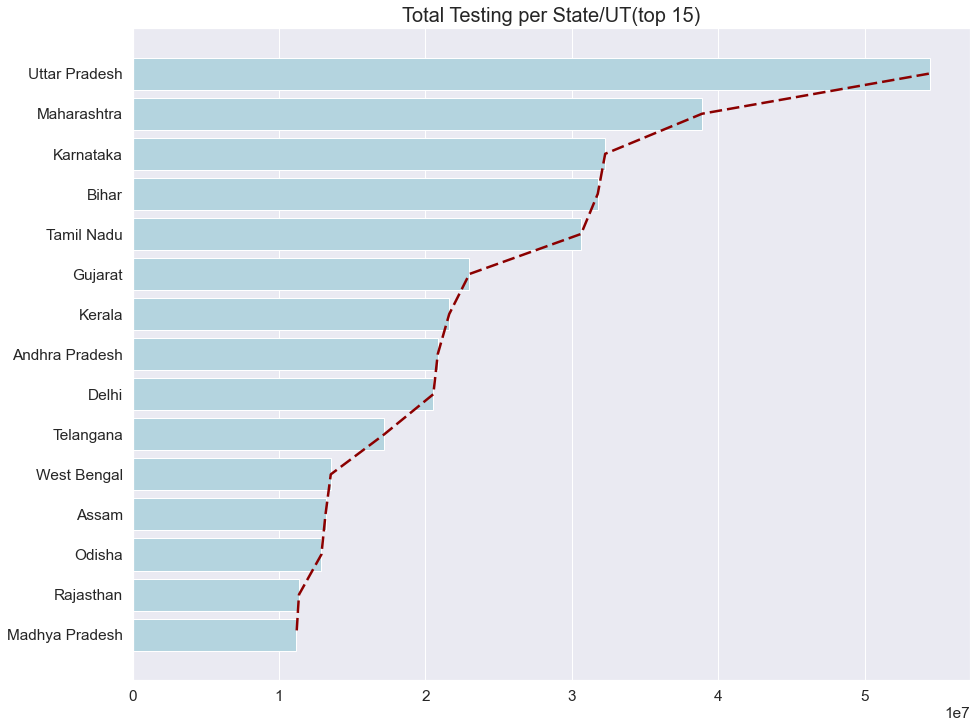

In [33]:
def plotHGraphs(x, y, title):
    sns.set(font_scale=1.4)
    ysmoothed = gaussian_filter1d(y, sigma=0.3)
    fig,ax=plt.subplots(figsize=(15, 12))
    sns.barplot(y,x,color='lightblue')
    plt.plot(ysmoothed,x,linestyle='dashed',color='darkred',dashes=(5,2),lw=2.5)
    ax.set_ylabel('')   
    ax.set_xlabel('')   
    plt.title(title, size=20)
    plt.show()


plotHGraphs(df1.sort_values('Tested',ascending=False).head(15)['State'],df1.sort_values('Tested',ascending=False).head(15)['Tested'],'Total Testing per State/UT(top 15)')  

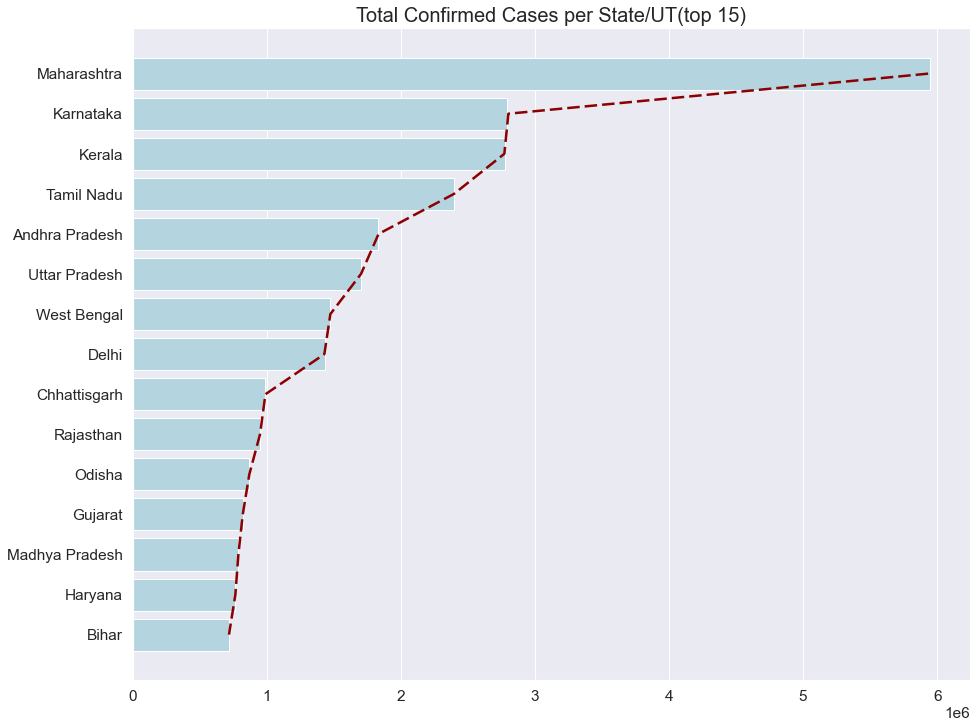

In [34]:
plotHGraphs(df1.sort_values('Confirmed',ascending=False).head(15)['State'],df1.sort_values('Confirmed',ascending=False).head(15)['Confirmed'],'Total Confirmed Cases per State/UT(top 15)')  

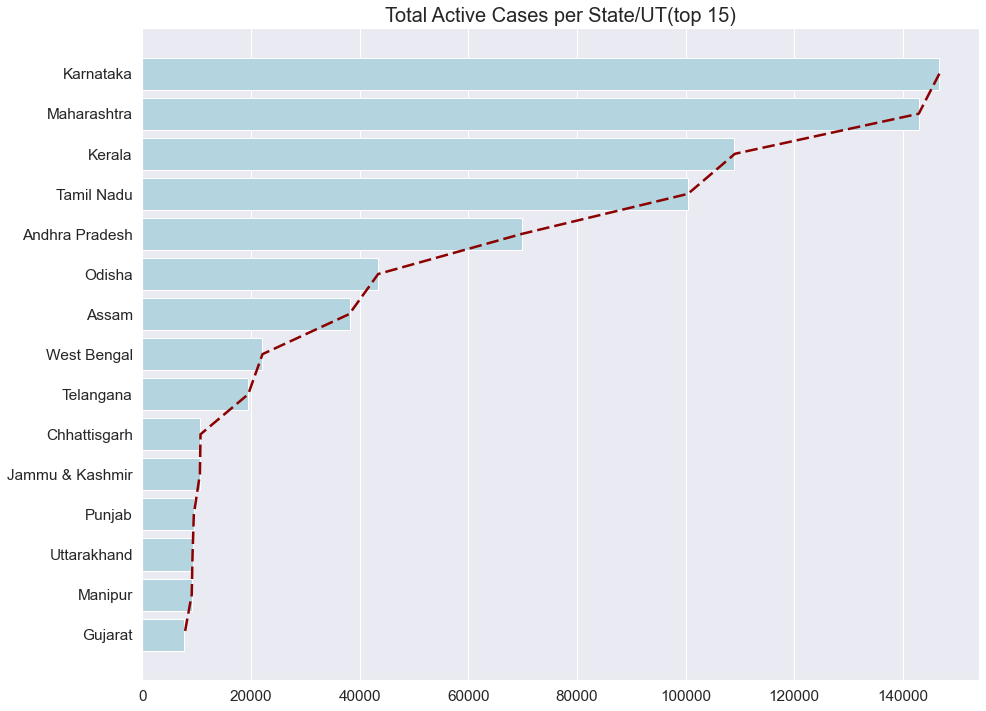

In [35]:
plotHGraphs(df1.sort_values('Active',ascending=False).head(15)['State'],df1.sort_values('Active',ascending=False).head(15)['Active'],'Total Active Cases per State/UT(top 15)')

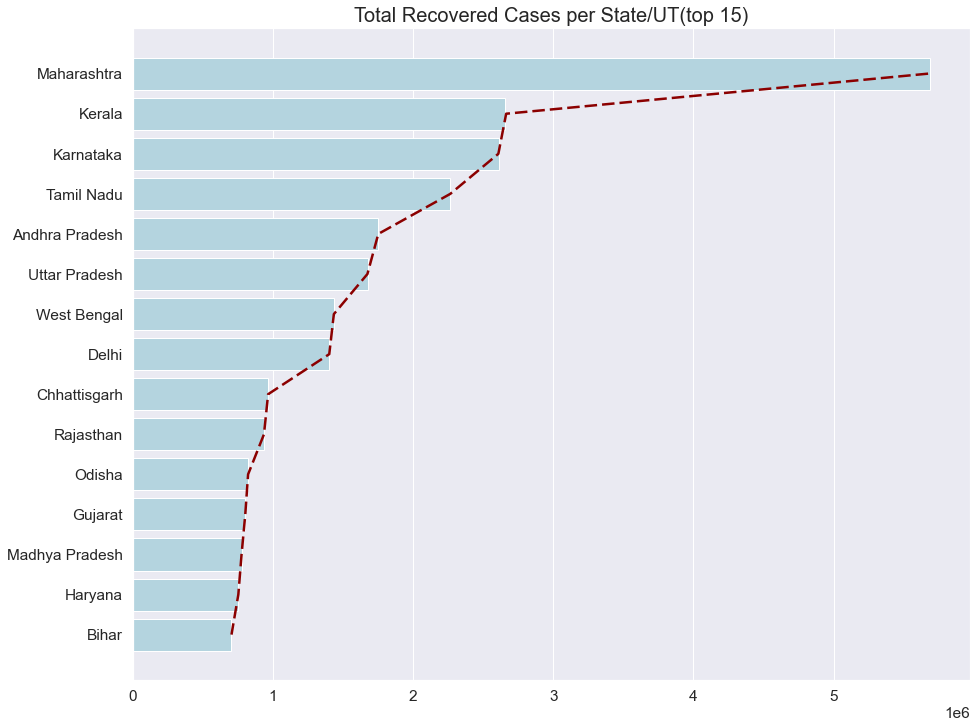

In [36]:
plotHGraphs(df1.sort_values('Recovered',ascending=False).head(15)['State'],df1.sort_values('Recovered',ascending=False).head(15)['Recovered'],'Total Recovered Cases per State/UT(top 15)')   


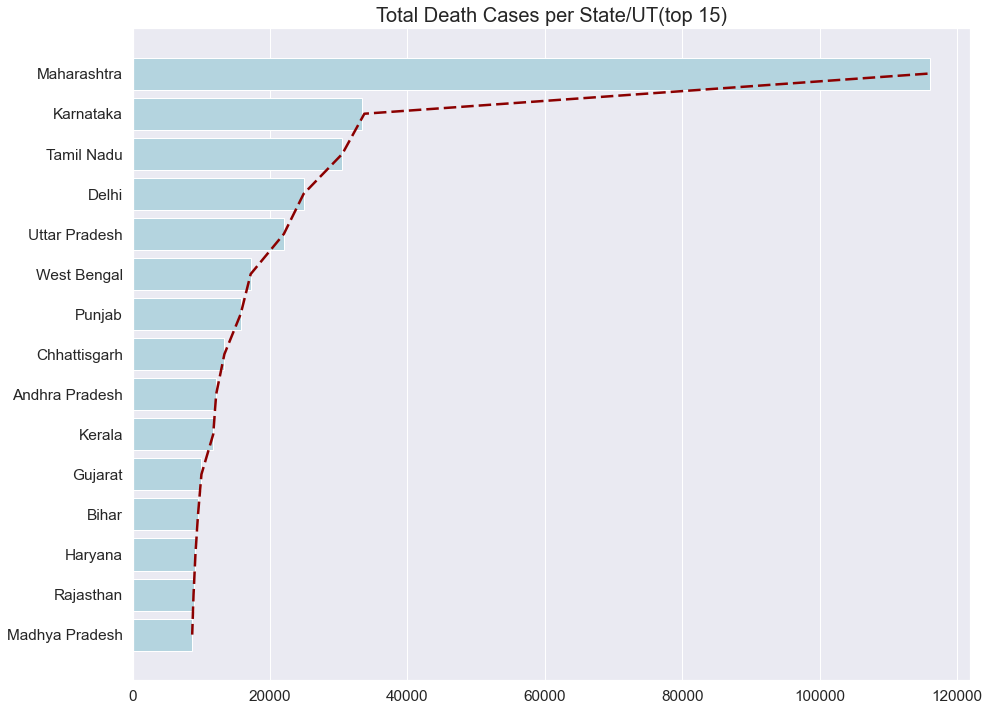

In [37]:
plotHGraphs(df1.sort_values('Deceased',ascending=False).head(15)['State'],df1.sort_values('Deceased',ascending=False).head(15)['Deceased'],'Total Death Cases per State/UT(top 15)')   


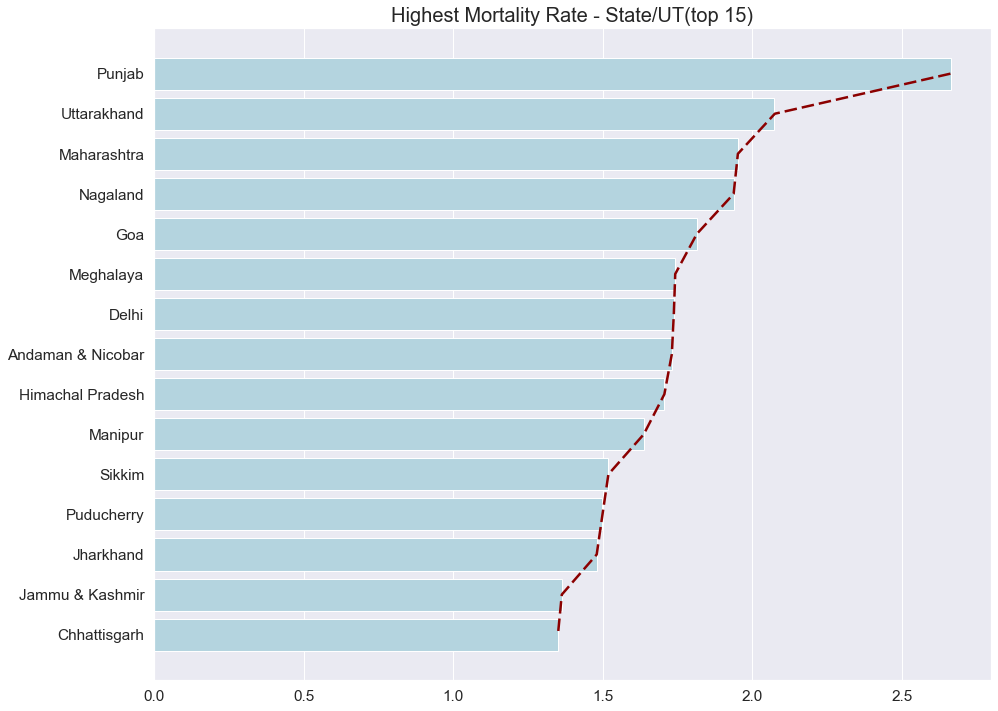

In [38]:
plotHGraphs(df1.sort_values('Mortality Rate(per 100)',ascending=False).head(15)['State'],df1.sort_values('Mortality Rate(per 100)',ascending=False).head(15)['Mortality Rate(per 100)'],'Highest Mortality Rate - State/UT(top 15)') 

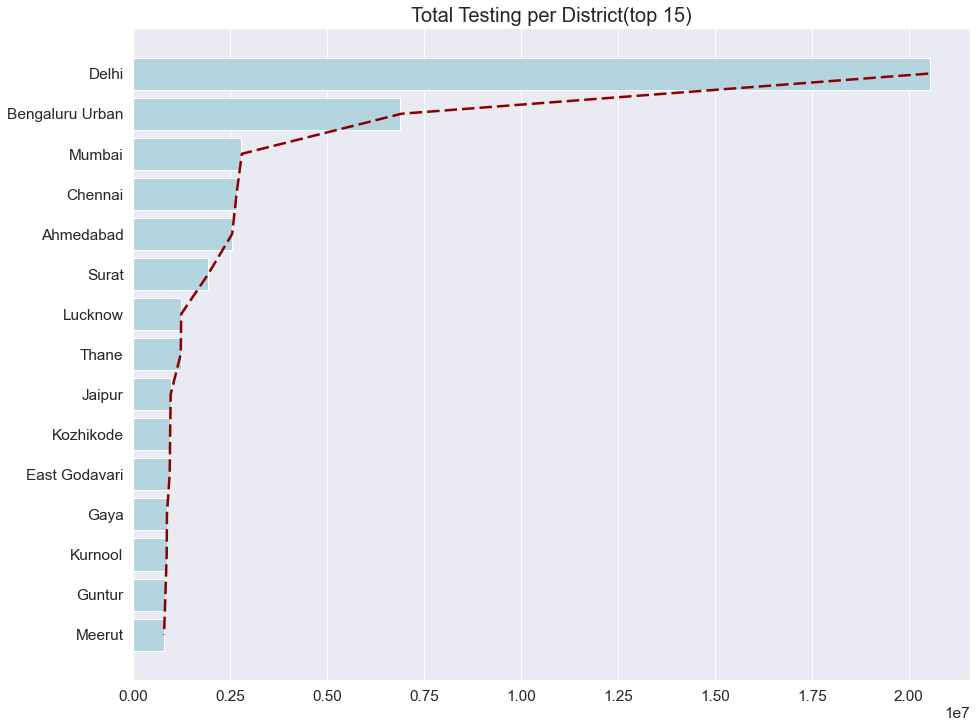

In [39]:
plotHGraphs(dis_df1.sort_values('Tested',ascending=False).head(15)['District'],dis_df1.sort_values('Tested',ascending=False).head(15)['Tested'],'Total Testing per District(top 15)')   

In [40]:
district_wise['District']=district_wise[['District','State']].apply(fill_unknown,axis=1)

district_wise=district_wise[district_wise['State']!='State Unassigned']

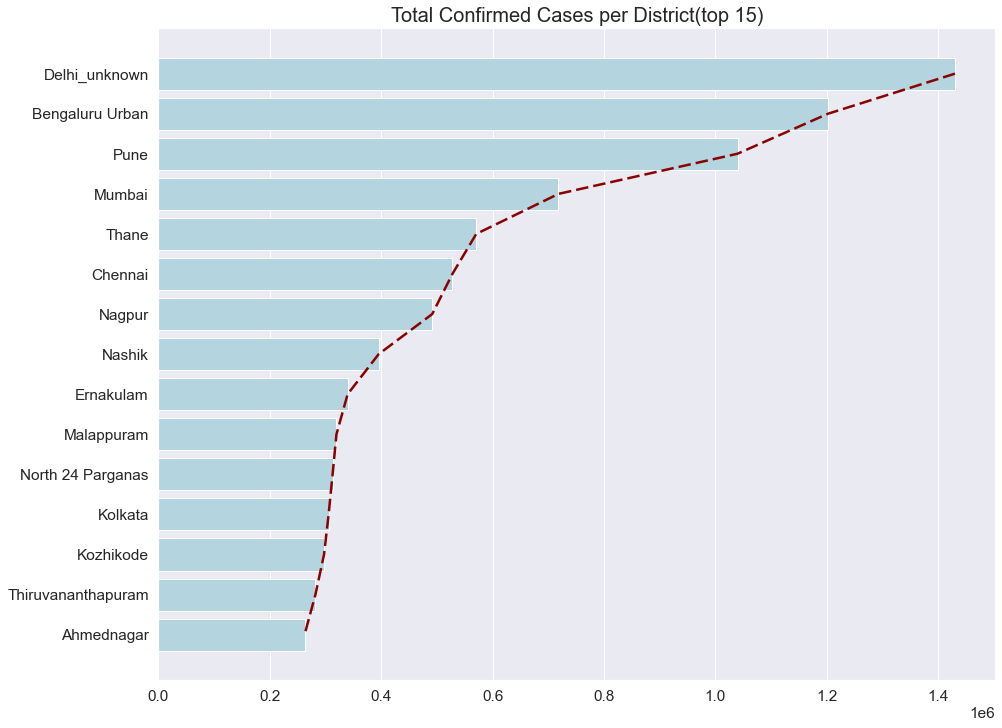

In [41]:
plotHGraphs(district_wise.sort_values('Confirmed',ascending=False).head(15)['District'],district_wise.sort_values('Confirmed',ascending=False).head(15)['Confirmed'],'Total Confirmed Cases per District(top 15)')

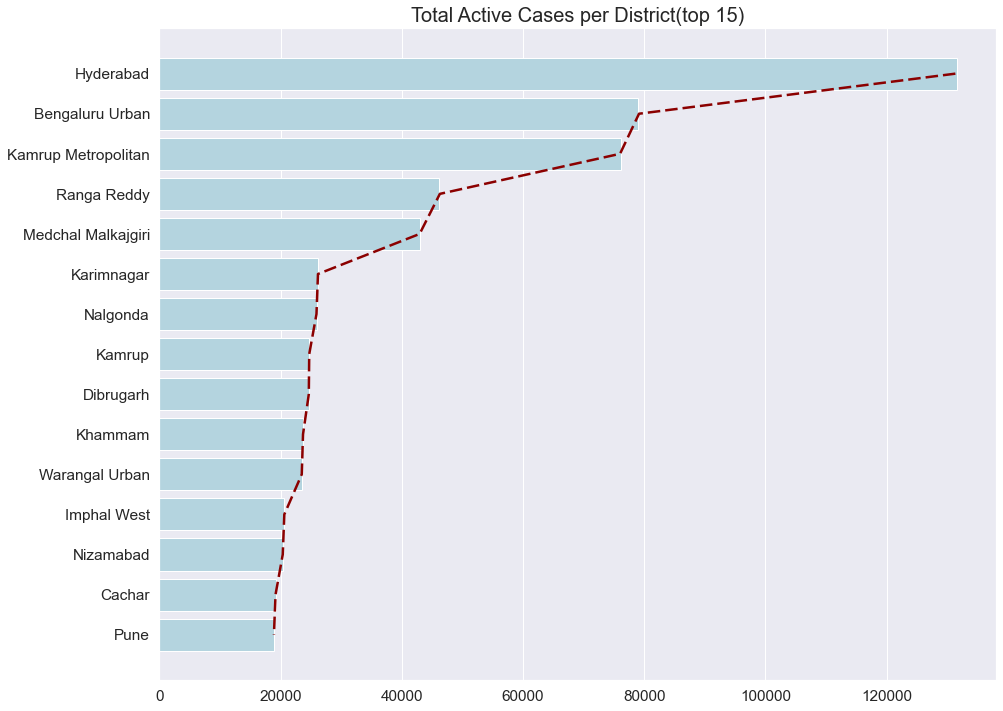

In [42]:
plotHGraphs(district_wise.sort_values('Active',ascending=False).head(15)['District'],district_wise.sort_values('Active',ascending=False).head(15)['Active'],'Total Active Cases per District(top 15)')   

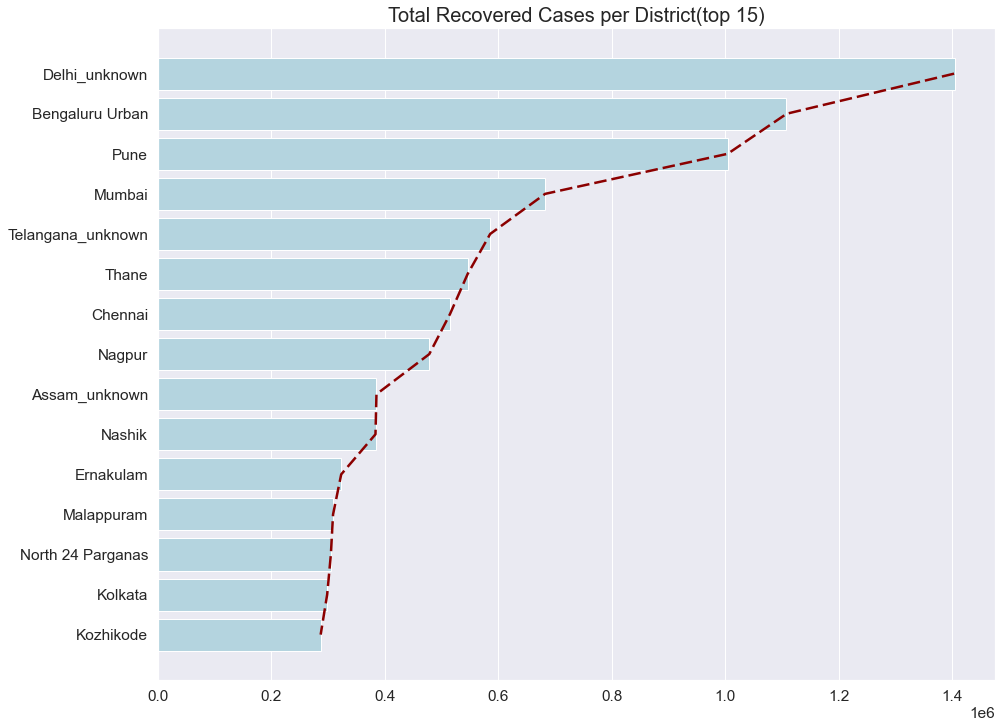

In [43]:
plotHGraphs(district_wise.sort_values('Recovered',ascending=False).head(15)['District'],district_wise.sort_values('Recovered',ascending=False).head(15)['Recovered'],'Total Recovered Cases per District(top 15)')   

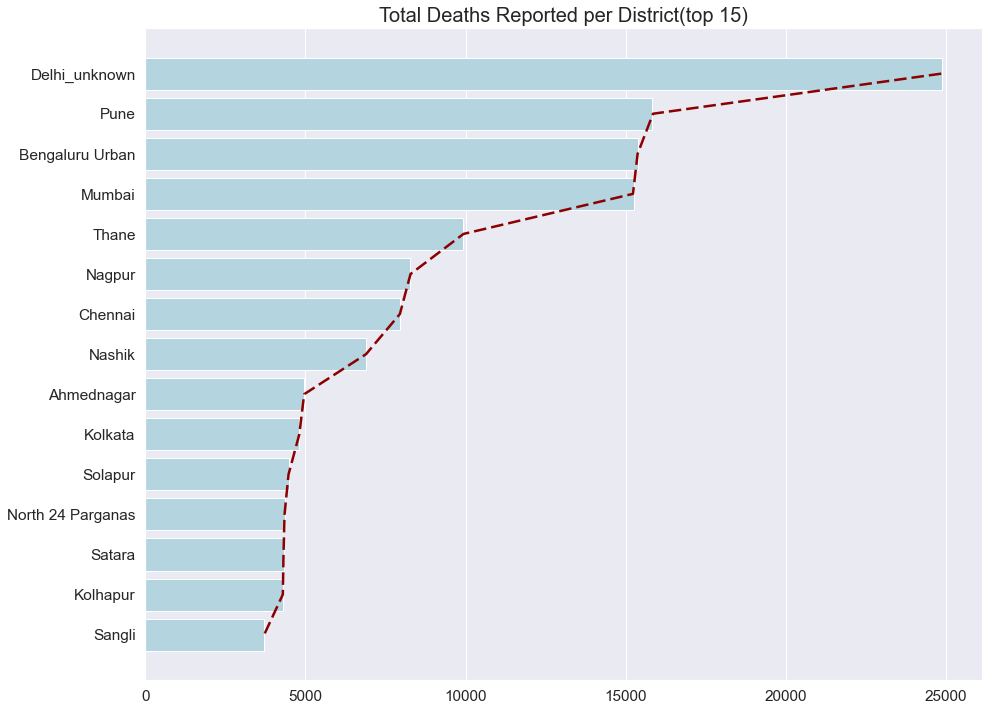

In [44]:
plotHGraphs(district_wise.sort_values('Deceased',ascending=False).head(15)['District'],district_wise.sort_values('Deceased',ascending=False).head(15)['Deceased'],'Total Deaths Reported per District(top 15)')   

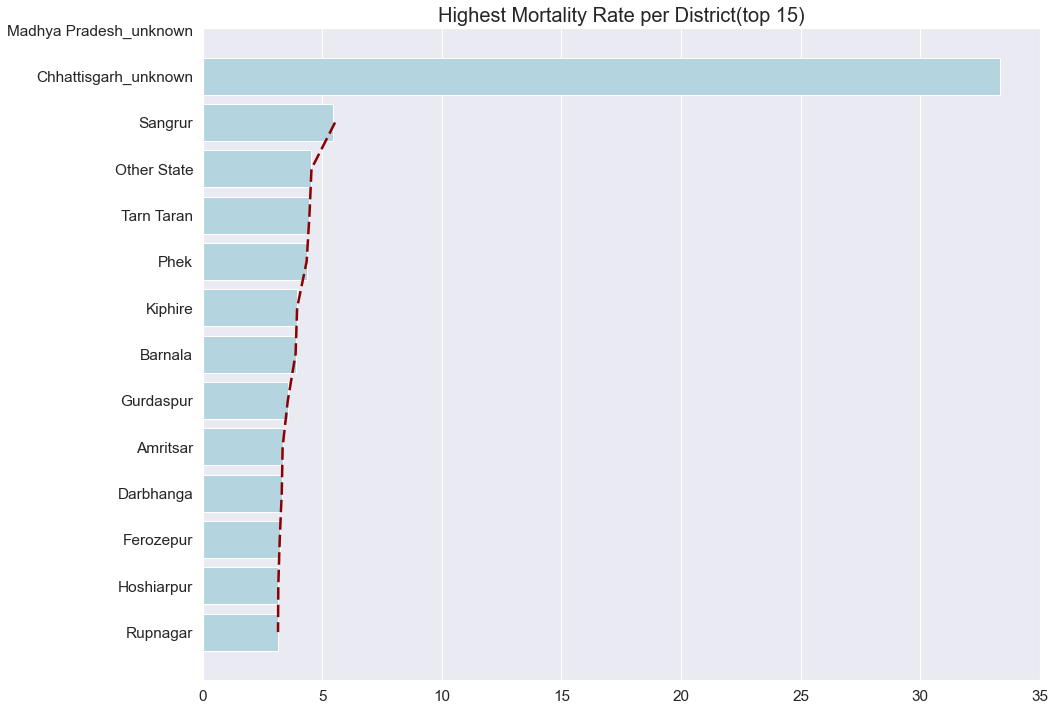

In [45]:
plotHGraphs(dis_df1.sort_values('Mortality Rate(per 100)',ascending=False).head(15)['District'],dis_df1.sort_values('Mortality Rate(per 100)',ascending=False).head(15)['Mortality Rate(per 100)'],'Highest Mortality Rate per District(top 15)') 

# WORST HIT STATE

## 1.CONFIRMED CASES

In [47]:
df1.sort_values('Confirmed', ascending= False).set_index("State").drop(columns=['Date','Other','Tested']).head(1).style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})

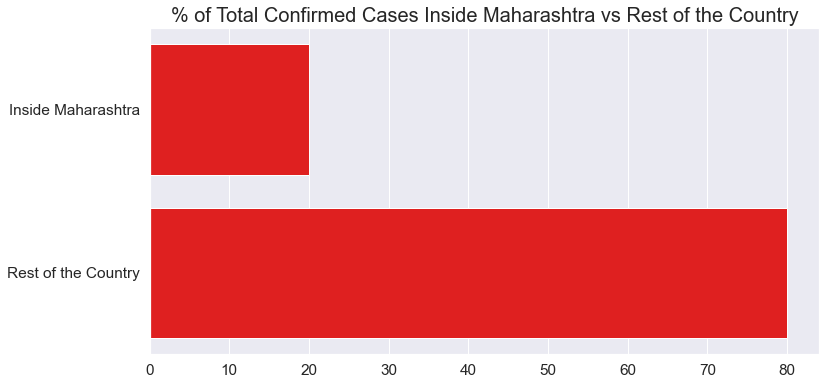

In [48]:
worst_hit_state=df1.sort_values('Confirmed',ascending=False)['State'].iloc[0]
whit_dsdf=district_wise[district_wise['State']==worst_hit_state]
whit_dsdf=whit_dsdf.sort_values('Confirmed',ascending=False)
#whit_dsdf.head()

country_total=india_data.sort_values('Confirmed').tail(1)['Confirmed'].iloc[0]
worststate_total=df1.sort_values('Confirmed',ascending=False)['Confirmed'].iloc[0]

inside_per=(worststate_total/country_total)*100
outside_per=100-inside_per

plt.figure(figsize=(12,6))
sns.barplot([inside_per,outside_per],['Inside '+worst_hit_state,'Rest of the Country'],color='red')
plt.title("% of Total Confirmed Cases Inside "+worst_hit_state+" vs Rest of the Country" , size=20)
plt.show()




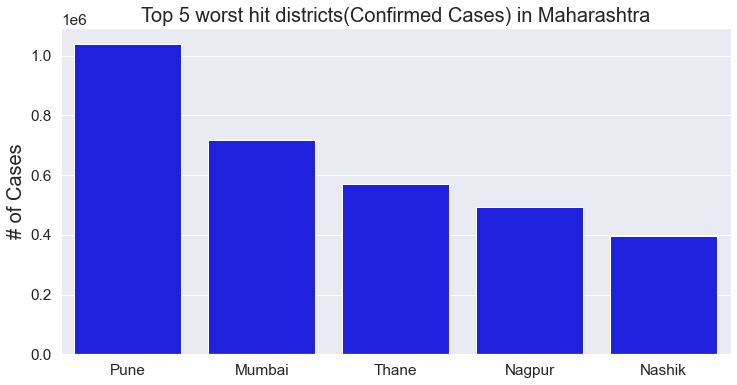

In [49]:
plt.figure(figsize=(12,6))

sns.barplot(whit_dsdf['District'].head(5),whit_dsdf['Confirmed'].head(5),color='blue')
plt.ylabel('# of Cases',size=20)   
plt.xlabel('',size=20)   
plt.title("Top 5 worst hit districts(Confirmed Cases) in "+worst_hit_state , size=20)
plt.show()

## 2. ACTIVE CASES

In [50]:
df1.sort_values('Active', ascending= False).set_index("State").drop(columns=['Date','Other','Tested',]).head(1).style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})

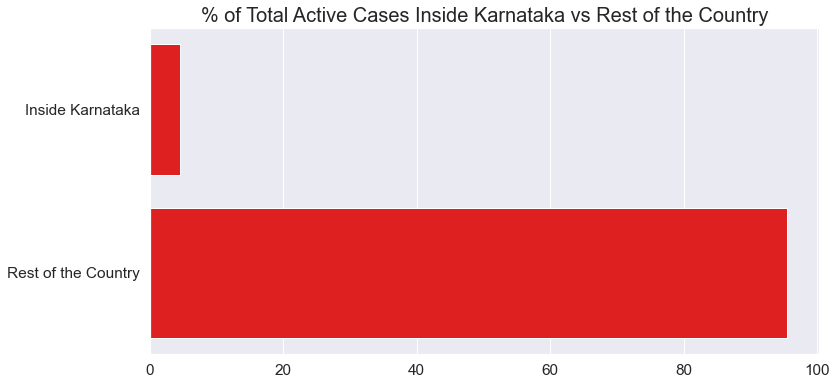

In [51]:
worst_hit_state=df1.sort_values('Active',ascending=False)['State'].iloc[0]
whit_dsdf=district_wise[district_wise['State']==worst_hit_state]
whit_dsdf=whit_dsdf.sort_values('Active',ascending=False)

country_total=india_data.sort_values('Active').tail(1)['Active'].iloc[0]
worststate_total=df1.sort_values('Active',ascending=False)['Active'].iloc[0]

inside_per=(worststate_total/country_total)*100
outside_per=100-inside_per

plt.figure(figsize=(12,6))
sns.barplot([inside_per,outside_per],['Inside '+worst_hit_state,'Rest of the Country'],color='red')
plt.title("% of Total Active Cases Inside "+worst_hit_state+" vs Rest of the Country" , size=20)
plt.show()

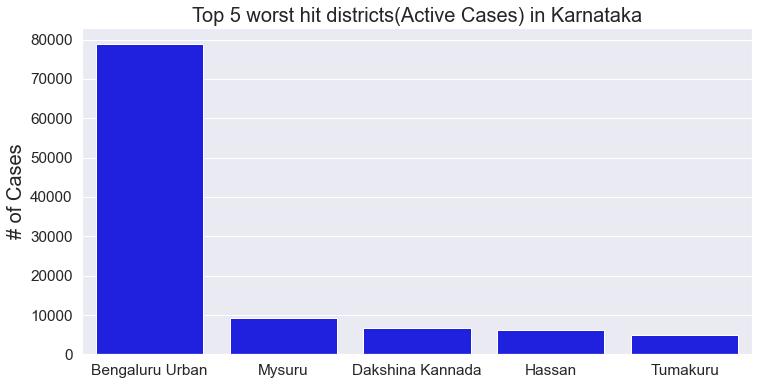

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(whit_dsdf['District'].head(5),whit_dsdf['Active'].head(5),color='blue')
plt.ylabel('# of Cases',size=20)   
plt.xlabel('',size=20)   
plt.title("Top 5 worst hit districts(Active Cases) in "+worst_hit_state , size=20)
plt.show()

## DEATH REPORTS

In [53]:
df1.sort_values('Deceased', ascending= False).set_index("State").drop(columns=['Date','Other','Tested']).head(1).style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})

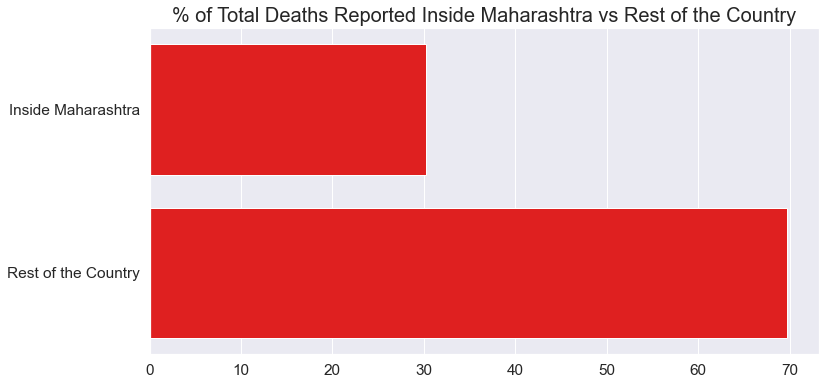

In [54]:
worst_hit_state=df1.sort_values('Deceased',ascending=False)['State'].iloc[0]
whit_dsdf=district_wise[district_wise['State']==worst_hit_state]
whit_dsdf=whit_dsdf.sort_values('Deceased',ascending=False)

country_total=india_data.sort_values('Deceased').tail(1)['Deceased'].iloc[0]
worststate_total=df1.sort_values('Deceased',ascending=False)['Deceased'].iloc[0]

inside_per=(worststate_total/country_total)*100
outside_per=100-inside_per

plt.figure(figsize=(12,6))
sns.barplot([inside_per,outside_per],['Inside '+worst_hit_state,'Rest of the Country'],color='red')
plt.title("% of Total Deaths Reported Inside "+worst_hit_state+" vs Rest of the Country" , size=20)
plt.show()

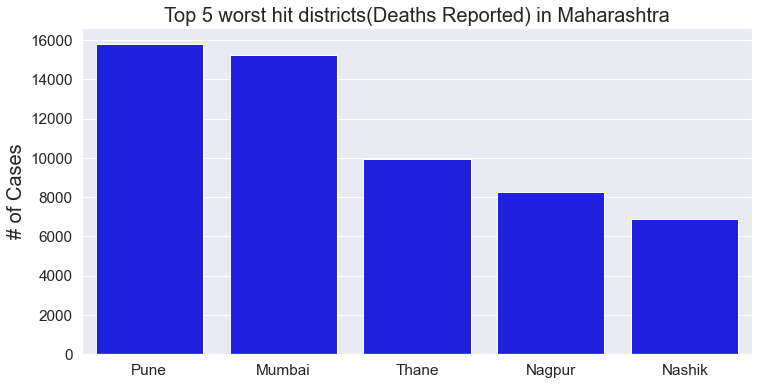

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(whit_dsdf['District'].head(5),whit_dsdf['Deceased'].head(5),color='blue')
plt.ylabel('# of Cases',size=20)   
plt.xlabel('',size=20)   
plt.title("Top 5 worst hit districts(Deaths Reported) in "+worst_hit_state , size=20)
plt.show()

## MORTALITY RATE

In [56]:
df1.sort_values('Mortality Rate(per 100)', ascending= False).set_index("State").drop(columns=['Date','Other','Tested']).head(1).style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})

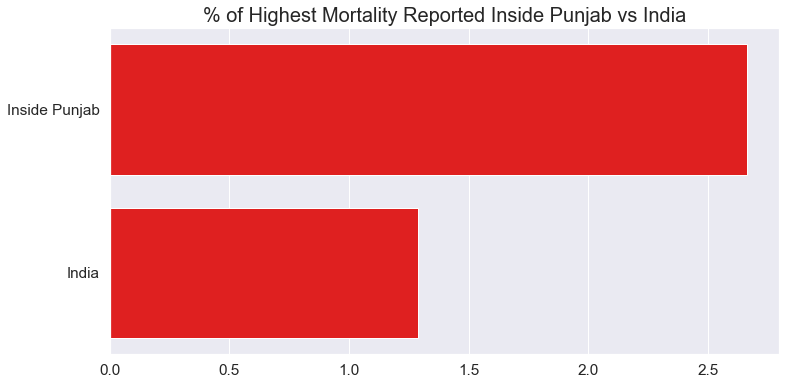

In [57]:
worst_hit_state=df1.sort_values('Mortality Rate(per 100)',ascending=False)['State'].iloc[0]
whit_dsdf=district_wise[district_wise['State']==worst_hit_state]
whit_dsdf['Mortality Rate(per 100)']=whit_dsdf[['Confirmed','Deceased']].apply(fill_mortality,axis=1)   
whit_dsdf=whit_dsdf.sort_values('Mortality Rate(per 100)',ascending=False)
#whit_dsdf.head()

country_total=india_data.sort_values('Confirmed').tail(1)['Mortality Rate(per 100)'].iloc[0]
worststate_total=df1.sort_values('Mortality Rate(per 100)',ascending=False)['Mortality Rate(per 100)'].iloc[0]

plt.figure(figsize=(12,6))
sns.barplot([worststate_total,country_total],['Inside '+worst_hit_state,'India'],color='red')
plt.title("% of Highest Mortality Reported Inside "+worst_hit_state+" vs India" , size=20)
plt.show()

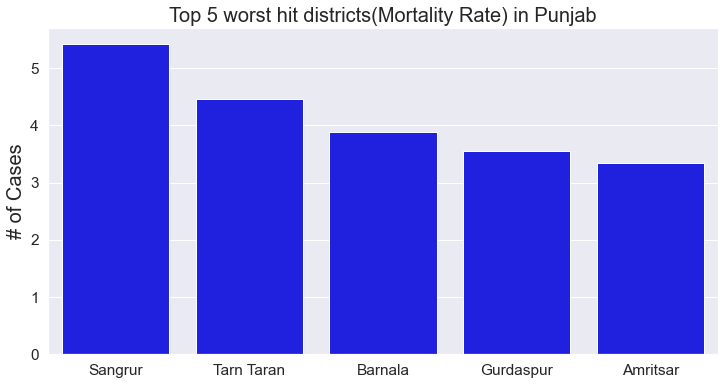

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(whit_dsdf['District'].head(5),whit_dsdf['Mortality Rate(per 100)'].head(5),color='blue')
plt.ylabel('# of Cases',size=20)   
plt.xlabel('',size=20)   
plt.title("Top 5 worst hit districts(Mortality Rate) in "+worst_hit_state , size=20)
plt.show()

## STATE WISE TABULATED DATA

In [59]:
india_total=india_data.tail(1).set_index('State')
india_total.drop(columns=['Date','Other'],inplace=True)
df1.sort_values('Confirmed', ascending= False).set_index("State").drop(columns=['Date','Other','Tested']).style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deceased"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Reds',subset=["Mortality Rate(per 100)"])\
                        .background_gradient(cmap='Greens',subset=["Recovery Rate(per 100)"])

In [60]:
india_total.style.set_properties(**{'background-color': 'orange', 
                           'color': 'white'})